# Data Preparation

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext

spark = SparkSession.builder.master("local[*]").getOrCreate()
sc = SparkContext.getOrCreate();

In [ ]:
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

In [ ]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ins = spark.read.csv("/content/drive/MyDrive/Sample_Data/insurance.csv", header=True)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Sample_Data/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


femail = 0 , male = 1

In [ ]:
df['sex'] = np.where(df['sex'] == "female", 0, 1)

In [ ]:
df['smoker'] = np.where(df['smoker'] == 'no', 0, 1)

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,northwest,10600.55
1334,18,0,31.9,0,0,northeast,2205.98
1335,18,0,36.9,0,0,southeast,1629.83
1336,21,0,25.8,0,0,southwest,2007.95


In [ ]:
df.loc[df['region'] == 'southwest', 'region'] = 0
df.loc[df['region'] == 'southeast', 'region'] = 1
df.loc[df['region'] == 'northwest', 'region'] = 2
df.loc[df['region'] == 'northeast', 'region'] = 3
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2,10600.55
1334,18,0,31.9,0,0,3,2205.98
1335,18,0,36.9,0,0,1,1629.83
1336,21,0,25.8,0,0,0,2007.95


In [ ]:
df['label'] = df['expenses']

In [ ]:
from pyspark.ml.regression import LinearRegression

In [ ]:
insDF = spark.createDataFrame(df)
insDF.show()

+---+---+----+--------+------+------+--------+--------+
|age|sex| bmi|children|smoker|region|expenses|   label|
+---+---+----+--------+------+------+--------+--------+
| 19|  0|27.9|       0|     1|     0|16884.92|16884.92|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|
| 28|  1|33.0|       3|     0|     1| 4449.46| 4449.46|
| 33|  1|22.7|       0|     0|     2|21984.47|21984.47|
| 32|  1|28.9|       0|     0|     2| 3866.86| 3866.86|
| 31|  0|25.7|       0|     0|     1| 3756.62| 3756.62|
| 46|  0|33.4|       1|     0|     1| 8240.59| 8240.59|
| 37|  0|27.7|       3|     0|     2| 7281.51| 7281.51|
| 37|  1|29.8|       2|     0|     3| 6406.41| 6406.41|
| 60|  0|25.8|       0|     0|     2|28923.14|28923.14|
| 25|  1|26.2|       0|     0|     3| 2721.32| 2721.32|
| 62|  0|26.3|       0|     1|     1|27808.73|27808.73|
| 23|  1|34.4|       0|     0|     0| 1826.84| 1826.84|
| 56|  0|39.8|       0|     0|     1|11090.72|11090.72|
| 27|  1|42.1|       0|     1|     1|39611.76|39

In [ ]:
vectorAssembler = VectorAssembler(inputCols=['age','sex','bmi','smoker'], outputCol='features')

In [ ]:
vinsDF = vectorAssembler.transform(insDF)
vinsDF.show()

+---+---+----+--------+------+------+--------+--------+-------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|           features|
+---+---+----+--------+------+------+--------+--------+-------------------+
| 19|  0|27.9|       0|     1|     0|16884.92|16884.92|[19.0,0.0,27.9,1.0]|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|[18.0,1.0,33.8,0.0]|
| 28|  1|33.0|       3|     0|     1| 4449.46| 4449.46|[28.0,1.0,33.0,0.0]|
| 33|  1|22.7|       0|     0|     2|21984.47|21984.47|[33.0,1.0,22.7,0.0]|
| 32|  1|28.9|       0|     0|     2| 3866.86| 3866.86|[32.0,1.0,28.9,0.0]|
| 31|  0|25.7|       0|     0|     1| 3756.62| 3756.62|[31.0,0.0,25.7,0.0]|
| 46|  0|33.4|       1|     0|     1| 8240.59| 8240.59|[46.0,0.0,33.4,0.0]|
| 37|  0|27.7|       3|     0|     2| 7281.51| 7281.51|[37.0,0.0,27.7,0.0]|
| 37|  1|29.8|       2|     0|     3| 6406.41| 6406.41|[37.0,1.0,29.8,0.0]|
| 60|  0|25.8|       0|     0|     2|28923.14|28923.14|[60.0,0.0,25.8,0.0]|
| 25|  1|26.

In [ ]:
#indexer = StringIndexer(inputCol='expenses', outputCol='label')
#ivinsDF = indexer.fit(vinsDF).transform(vinsDF)
#ivinsDF.show()

In [ ]:
splits = vinsDF.randomSplit([0.7,0.3],1)
trainDF = splits[0]
testDF = splits[1]

In [ ]:
trainDF.show()

+---+---+----+--------+------+------+--------+--------+-------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|           features|
+---+---+----+--------+------+------+--------+--------+-------------------+
| 18|  0|20.8|       0|     0|     1| 1607.51| 1607.51|[18.0,0.0,20.8,0.0]|
| 18|  0|24.1|       1|     0|     1|  2201.1|  2201.1|[18.0,0.0,24.1,0.0]|
| 18|  0|25.1|       0|     0|     3| 2196.47| 2196.47|[18.0,0.0,25.1,0.0]|
| 18|  0|26.3|       0|     0|     3| 2198.19| 2198.19|[18.0,0.0,26.3,0.0]|
| 18|  0|29.2|       0|     0|     3| 7323.73| 7323.73|[18.0,0.0,29.2,0.0]|
| 18|  0|30.1|       0|     0|     3| 2203.47| 2203.47|[18.0,0.0,30.1,0.0]|
| 18|  0|30.1|       0|     0|     3|21344.85|21344.85|[18.0,0.0,30.1,0.0]|
| 18|  0|31.4|       0|     0|     1| 1622.19| 1622.19|[18.0,0.0,31.4,0.0]|
| 18|  0|32.1|       2|     0|     1| 2801.26| 2801.26|[18.0,0.0,32.1,0.0]|
| 18|  0|33.2|       0|     0|     3|  2207.7|  2207.7|[18.0,0.0,33.2,0.0]|
| 18|  0|33.

In [ ]:
testDF.show()

+---+---+----+--------+------+------+--------+--------+-------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|           features|
+---+---+----+--------+------+------+--------+--------+-------------------+
| 18|  0|26.7|       0|     0|     1| 1615.77| 1615.77|[18.0,0.0,26.7,0.0]|
| 18|  0|36.9|       0|     1|     1|36149.48|36149.48|[18.0,0.0,36.9,1.0]|
| 18|  0|37.3|       1|     0|     1| 2219.45| 2219.45|[18.0,0.0,37.3,0.0]|
| 18|  0|38.2|       0|     0|     1| 1631.67| 1631.67|[18.0,0.0,38.2,0.0]|
| 18|  0|38.3|       0|     0|     1|14133.04|14133.04|[18.0,0.0,38.3,0.0]|
| 18|  1|31.7|       2|     1|     1|34303.17|34303.17|[18.0,1.0,31.7,1.0]|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|[18.0,1.0,33.8,0.0]|
| 18|  1|34.1|       0|     0|     1| 1137.01| 1137.01|[18.0,1.0,34.1,0.0]|
| 19|  0|28.3|       0|     1|     2|17468.98|17468.98|[19.0,0.0,28.3,1.0]|
| 19|  0|28.6|       5|     0|     0|  4687.8|  4687.8|[19.0,0.0,28.6,0.0]|
| 19|  0|32.

In [ ]:
testDF.select('features').where('expenses == 1737.38').take(1)

[]

In [ ]:
testDF.select('features').where('expenses == 2331.52').take(1)

[]

In [ ]:
vinsDF.count()

1338

# Linear Regression

In [ ]:
lr = LinearRegression(featuresCol='features', labelCol='label')

In [ ]:
lrModel = lr.fit(trainDF)

In [ ]:
lrPrediction = lrModel.transform(testDF)
lrPrediction.show()

+---+---+----+--------+------+------+--------+--------+-------------------+------------------+
|age|sex| bmi|children|smoker|region|expenses|   label|           features|        prediction|
+---+---+----+--------+------+------+--------+--------+-------------------+------------------+
| 18|  0|26.7|       0|     0|     1| 1615.77| 1615.77|[18.0,0.0,26.7,0.0]|1826.1057175884835|
| 18|  0|36.9|       0|     1|     1|36149.48|36149.48|[18.0,0.0,36.9,1.0]|29214.871207098382|
| 18|  0|37.3|       1|     0|     1| 2219.45| 2219.45|[18.0,0.0,37.3,0.0]| 5003.657442829002|
| 18|  0|38.2|       0|     0|     1| 1631.67| 1631.67|[18.0,0.0,38.2,0.0]| 5273.449570443767|
| 18|  0|38.3|       0|     0|     1|14133.04|14133.04|[18.0,0.0,38.3,0.0]| 5303.426473512072|
| 18|  1|31.7|       2|     1|     1|34303.17|34303.17|[18.0,1.0,31.7,1.0]|27579.466402495018|
| 18|  1|33.8|       1|     0|     1| 1725.55| 1725.55|[18.0,1.0,33.8,0.0]| 3877.859990386856|
| 18|  1|34.1|       0|     0|     1| 1137.01| 113

In [ ]:
evaluator = MulticlassClassificationEvaluator()

In [ ]:
evaluator.setPredictionCol("prediction")

MulticlassClassificationEvaluator_87dc92f737b3

In [ ]:
dfAccuracy = evaluator.evaluate(lrPrediction)

In [ ]:
dfAccuracy

0.0

In [ ]:
from pyspark.ml.feature import ChiSqSelector

In [ ]:
selector=ChiSqSelector(percentile=0.9, featuresCol="features", outputCol='selectedFeatures', labelCol= "label")
model=selector.fit(trainDF)
result = model.transform(trainDF)
trainDF =result.select('label','selectedFeatures').withColumnRenamed('selectedFeatures', 'features')
new_test=model.transform(testDF)
testDF=new_test.select('label','selectedFeatures').withColumnRenamed('selectedFeatures', 'features')

In [ ]:
df.sort_values(by=['expenses'])

,age,sex,bmi,children,smoker,region,expenses,label
940,18,1,23.2,0,0,1,1121.87,1121.87
808,18,1,30.1,0,0,1,1131.51,1131.51
1244,18,1,33.3,0,0,1,1135.94,1135.94
663,18,1,33.7,0,0,1,1136.40,1136.40
22,18,1,34.1,0,0,1,1137.01,1137.01
...,...,...,...,...,...,...,...,...
819,33,0,35.5,0,1,2,55135.40,55135.40
577,31,0,38.1,1,1,3,58571.07,58571.07
1230,52,1,34.5,3,1,2,60021.40,60021.40
1300,45,1,30.4,0,1,1,62592.87,62592.87


In [ ]:
lrModel.coefficients

DenseVector([260.893, -76.6058, 299.769, 24331.1214])

In [ ]:
lrModel.summary.rootMeanSquaredError

6110.989135017008

# Decision Tree

In [ ]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

In [ ]:
dt = DecisionTreeRegressor(featuresCol='features', labelCol='label')

In [ ]:
dtModel = dt.fit(trainDF)

In [ ]:
dtPredictions = dtModel.transform(testDF)

In [ ]:
dtPredictions.show()

+--------+-------------------+------------------+
|   label|           features|        prediction|
+--------+-------------------+------------------+
| 1615.77|[18.0,0.0,26.7,0.0]|2167.5588888888888|
|36149.48|[18.0,0.0,36.9,1.0]|38588.987272727274|
| 2219.45|[18.0,0.0,37.3,0.0]| 2359.932499999999|
| 1631.67|[18.0,0.0,38.2,0.0]| 2359.932499999999|
|14133.04|[18.0,0.0,38.3,0.0]| 2359.932499999999|
|34303.17|[18.0,1.0,31.7,1.0]| 36402.64864864865|
| 1725.55|[18.0,1.0,33.8,0.0]|  4696.11111111111|
| 1137.01|[18.0,1.0,34.1,0.0]|  4696.11111111111|
|17468.98|[19.0,0.0,28.3,1.0]|         17846.095|
|  4687.8|[19.0,0.0,28.6,0.0]|  4696.11111111111|
| 1748.77|[19.0,0.0,32.9,0.0]|  4696.11111111111|
| 2138.07|[19.0,0.0,37.4,0.0]| 2359.932499999999|
| 1242.82|[19.0,1.0,20.7,0.0]|2167.5588888888888|
| 1842.52|[19.0,1.0,28.4,0.0]|  4696.11111111111|
| 1261.44|[19.0,1.0,34.1,0.0]|  4696.11111111111|
| 1261.86|[19.0,1.0,34.4,0.0]|  4696.11111111111|
| 3056.39|[20.0,0.0,31.8,0.0]|  4696.11111111111|


In [ ]:
dtEvaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')

In [ ]:
rmse = dtEvaluator.evaluate(dtPredictions)
rmse

4525.1365820075425

# Random Rain Forrest

In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler

In [ ]:
rf = RandomForestRegressor(featuresCol='features', labelCol='label')

In [ ]:
rfModel = rf.fit(trainDF)

In [ ]:
rfPrediction = rfModel.transform(testDF)

In [ ]:
rfpdf = rfPrediction.toPandas()

In [ ]:
rfpdf['prediction']

0       4453.891206
1      37811.164226
2       3675.619946
3       3675.619946
4       3675.619946
           ...     
258    15086.945501
259    14315.843258
260    14539.328483
261    14621.058884
262    14093.944390
Name: prediction, Length: 263, dtype: float64

In [ ]:
rfPrediction.show()

+--------+-------------------+------------------+
|   label|           features|        prediction|
+--------+-------------------+------------------+
| 1615.77|[18.0,0.0,26.7,0.0]| 4453.891206180828|
|36149.48|[18.0,0.0,36.9,1.0]| 37811.16422640697|
| 2219.45|[18.0,0.0,37.3,0.0]|3675.6199458803158|
| 1631.67|[18.0,0.0,38.2,0.0]|3675.6199458803158|
|14133.04|[18.0,0.0,38.3,0.0]|3675.6199458803158|
|34303.17|[18.0,1.0,31.7,1.0]| 36353.42602912368|
| 1725.55|[18.0,1.0,33.8,0.0]| 4444.160198703723|
| 1137.01|[18.0,1.0,34.1,0.0]| 4293.405067767546|
|17468.98|[19.0,0.0,28.3,1.0]|17514.227685473197|
|  4687.8|[19.0,0.0,28.6,0.0]|5077.3441349992345|
| 1748.77|[19.0,0.0,32.9,0.0]| 4608.048940949534|
| 2138.07|[19.0,0.0,37.4,0.0]| 4414.378072966424|
| 1242.82|[19.0,1.0,20.7,0.0]| 3206.471032522345|
| 1842.52|[19.0,1.0,28.4,0.0]| 4552.992181148496|
| 1261.44|[19.0,1.0,34.1,0.0]| 4216.508555180133|
| 1261.86|[19.0,1.0,34.4,0.0]| 4216.508555180133|
| 3056.39|[20.0,0.0,31.8,0.0]| 4741.440929081743|


Text(0, 0.5, 'Prediction')

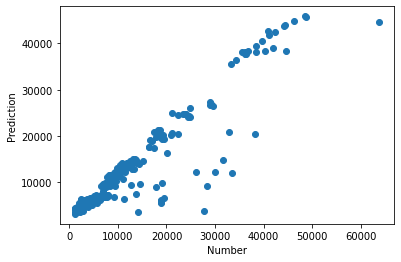

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(rfpdf['label'], rfpdf['prediction'])
plt.xlabel('Number')
plt.ylabel('Prediction')

In [ ]:
dtEvaluator = RegressionEvaluator(labelCol='label', predictionCol='prediction', metricName='rmse')

In [ ]:
rmse = dtEvaluator.evaluate(rfPrediction)

In [ ]:
rmse

4450.970359902083